In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [57]:
dataset = pd.read_csv('seattle-weather (1).csv')

In [58]:
print("Informasi Dataset:")
print(dataset.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [59]:
print("\nSampel Data:")
print(dataset.head())


Sampel Data:
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [6]:
print("\nStatistik Deskriptif:")
print(dataset.describe())


Statistik Deskriptif:
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


In [19]:
dataset.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [20]:
dataset.isnull()

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


In [23]:
dataset[dataset['temp_min']==min(dataset.temp_min)]

,date,precipitation,temp_max,temp_min,wind,weather
706,2013-12-07,0.0,0.0,-7.1,3.1,sun


<Axes: xlabel='temp_max', ylabel='Count'>

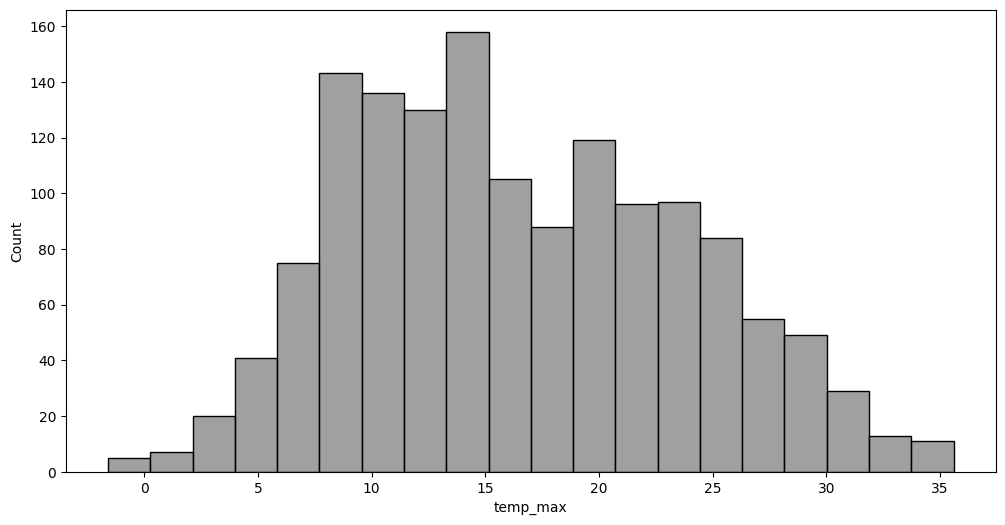

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(data=dataset,x=dataset.temp_max,bins=20, color='grey')

In [28]:
dataset.loc[:,['date','temp_max']]
dataset['date'] = pd.to_datetime(dataset['date'])

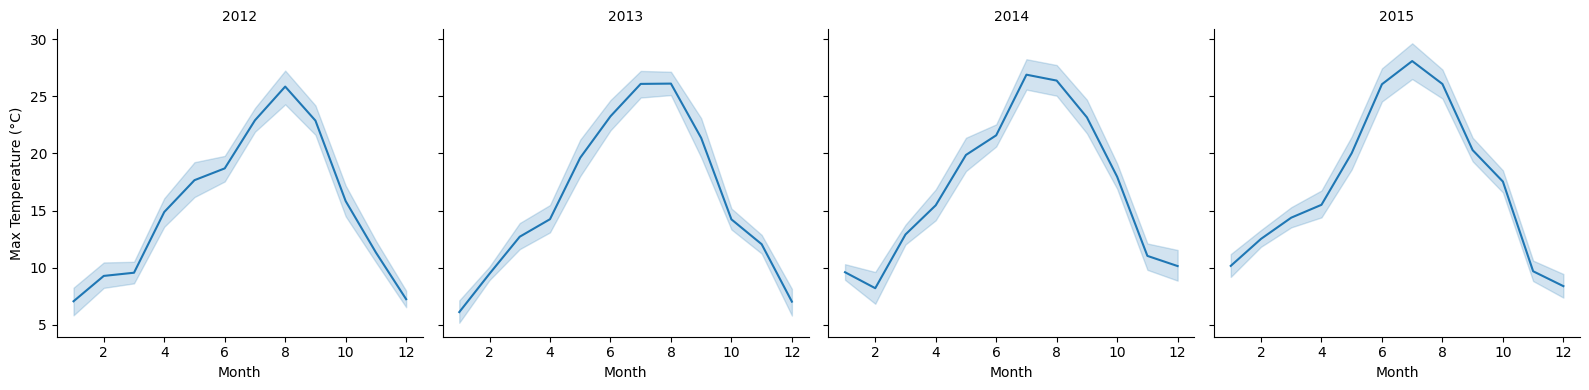

In [30]:
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
g = sns.FacetGrid(dataset, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

In [31]:
dataset.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

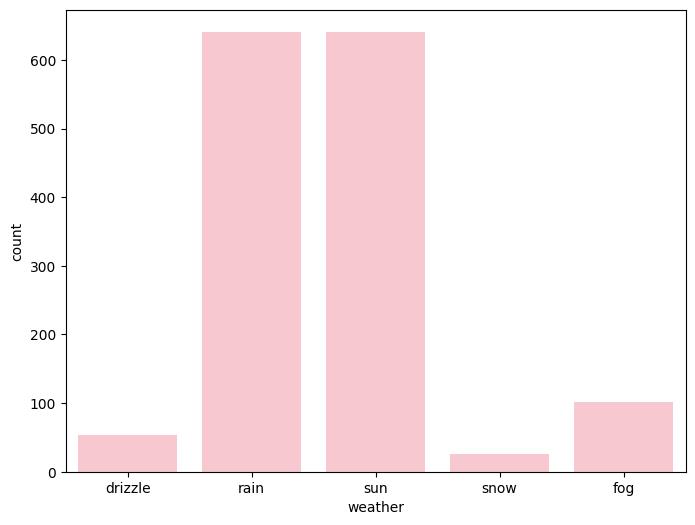

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(data=dataset,x=dataset.weather, color='Pink')

In [40]:
dataset.drop('month',axis=1,inplace=True)
dataset.drop('year',axis=1,inplace=True)

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['weather']=le.fit_transform(dataset['weather'])

In [51]:
x = dataset[['temp_min', 'temp_max', 'precipitation', 'wind']]
y=dataset['weather']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)


print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [55]:
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[  0   0   0   0   9]
 [  1   0   0   0  24]
 [  0   0 109   3   8]
 [  0   0   4   4   0]
 [  1   0   0   0 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.96      0.91      0.94       120
           3       0.57      0.50      0.53         8
           4       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.66      0.48      0.47       293
weighted avg       0.84      0.83      0.78       293



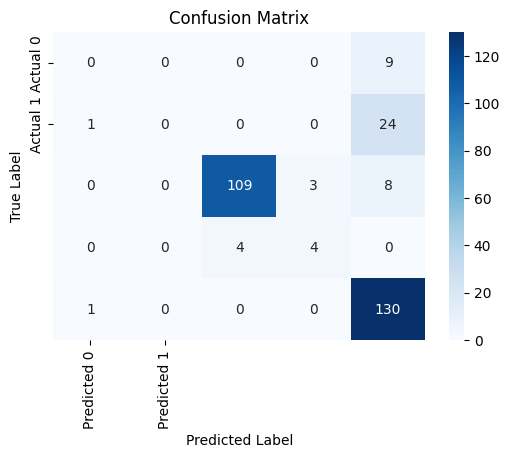

In [53]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()